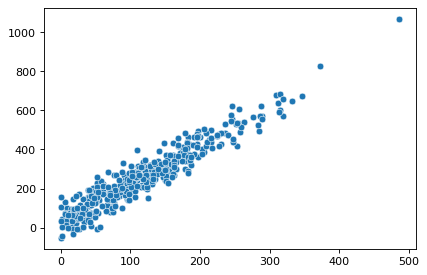

In [9]:
#0 Simulate phone dataset. 
#0a)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

data_x = np.abs(np.random.normal(loc=100, scale=100, size = 400))
data_error = np.random.normal(loc=0, scale=50, size=400)
data_y = 2*data_x + 25 + data_error

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = data_x, y = data_y)
plt.show()




In [ ]:
#0b)